In [2]:
import pandas as pd
from glob import glob
import os

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


**En el siguiente código se van a obtener archivos individuales _ortho.csv para cada organismo a partir del archivo de los ortogrupos obtenido del lanzamiento del Orthofinder con todas las proteínas de cada organismo**
Hay que tener en cuenta que en un mismo ortogrupo pueden aparacer más de una proteína, de ahí que al seprarlas cada una en una fila única se obtendrá un mayor número de filas que el Orthogroup.tsv original. 

In [3]:
# Cargar el archivo CSV
df = pd.read_csv("Orthogroups.tsv", sep="\t")
# Reemplazar los valores NaN con cero en todas las columnas
df = df.fillna(0)

# Iterar sobre cada columna que representa un organismo, excluyendo la primera columna "Orthogroup"
for col in df.columns[1:]:
    # Crear un DataFrame para el organismo actual
    organismo_df = df[["Orthogroup", col]]
    
    # Crear una lista para almacenar las nuevas filas
    nuevas_filas = []
    
    # Iterar sobre cada fila del DataFrame del organismo actual
    for index, row in organismo_df.iterrows():
        ortho = row["Orthogroup"]
        ids   = str(row[col]).split(",")  # Separar los IDs por coma
        
        # Iterar sobre cada ID y agregarlo como una nueva fila junto con el ortogrupo
        for id in ids:
           # nuevas_filas.append([ortho, int(id.strip())])  # Eliminar los espacios en blanco alrededor de los IDs si los hay
            nuevas_filas.append([ortho, int(id)])
    # Crear un nuevo DataFrame con las nuevas filas para el organismo actual
    nuevo_df = pd.DataFrame(nuevas_filas, columns=["Orthogroup", col])
    
    # Guardar el nuevo DataFrame en un nuevo archivo CSV con un nombre que incluya el nombre del organismo
    nuevo_df.to_csv(f"{col}_ortho.csv", index=False)
nuevo_df

,Orthogroup,Spoumb1
0,OG0000000,214713
1,OG0000000,359205
2,OG0000000,412114
3,OG0000000,429208
4,OG0000000,430837
...,...,...
18801,OG0015456,546701
18802,OG0015457,548458
18803,OG0015457,548459
18804,OG0015458,552648


**En el siguiente código se va a procesar el archivo de los clusters que contienen únicamente genes de levadura**

In [5]:
clustersL = pd.read_csv("clusters_only_yeast_df_all.csv")
clustersL["ID"] = clustersL["ID"].astype(int)
clustersL

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins
0,11,20,Cluster 9,1562135,1.411270,Yeast,Mucci_1562135,1
1,16,30,Cluster 14,1474846,6.000343,Yeast,Mucci_1474846,1
2,19,35,Cluster 16,1142208,1.405570,Yeast,Mucci_1142208,1
3,26,49,Cluster 23,1053451,1.747954,Yeast,Mucci_1053451,1
4,37,68,Cluster 31,1584864,2.093875,Yeast,Mucci_1584864,1
...,...,...,...,...,...,...,...,...
2969,11607,20578,Cluster 8971,1512507,1.098455,Yeast,Mucci_1512507,1
2970,11610,20584,Cluster 8974,1502870,2.520073,Yeast,Mucci_1502870,1
2971,11611,20586,Cluster 8975,1534011,3.016585,Yeast,Mucci_1534011,1
2972,11613,20590,Cluster 8977,1536429,6.146176,Yeast,Mucci_1536429,1


**En el siguiente código se va a procesar el archivo de los ortogrupos a los que pertenecen las proteínas de Mucor lusitanicus**

In [6]:
Mucci3 = pd.read_csv("Mucci3_ortho.csv")
Mucci3["Mucci3"] = Mucci3["Mucci3"].astype(int)
Mucci3

,Orthogroup,Mucci3
0,OG0000000,0
1,OG0000001,0
2,OG0000002,0
3,OG0000003,0
4,OG0000004,0
...,...,...
19113,OG0015454,0
19114,OG0015455,0
19115,OG0015456,0
19116,OG0015457,0


**Se va a realizar el merge de los datos de los clusters formados por proteínas de levadura con los datos de los ortogrupos de Mucor lusitanicus**

In [7]:
ortho_yeast_all = pd.merge(Mucci3, clustersL, left_on="Mucci3", right_on="ID")
ortho_yeast_all

,Orthogroup,Mucci3,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins
0,OG0000006,1070820,3037,5245,Cluster 2208,1070820,1.578035,Yeast,Mucci_1070820,1
1,OG0000006,1446787,6560,11409,Cluster 4849,1446787,1.252211,Yeast,Mucci_1446787,1
2,OG0000006,1447337,1914,3299,Cluster 1385,1447337,1.492939,Yeast,Mucci_1447337,1
3,OG0000006,1500185,2330,4007,Cluster 1677,1500185,1.155895,Yeast,Mucci_1500185,1
4,OG0000006,1551425,6122,10634,Cluster 4512,1551425,2.025278,Yeast,Mucci_1551425,1
...,...,...,...,...,...,...,...,...,...,...
2904,OG0013769,1573180,6819,11873,Cluster 5054,1573180,1.141322,Yeast,Mucci_1573180,1
2905,OG0013776,1584118,5464,9451,Cluster 3987,1584118,1.840529,Yeast,Mucci_1584118,1
2906,OG0013778,1585643,10758,19054,Cluster 8296,1585643,2.980494,Yeast,Mucci_1585643,2
2907,OG0013779,1585888,10971,19431,Cluster 8460,1585888,1.904428,Yeast,Mucci_1585888,1


Se va a contar el número de veces que aparece cada ortogrupo

In [8]:
# Contar las apariciones de cada Orthogroup
orthogroup_counts = ortho_yeast_all['Orthogroup'].value_counts()

# Mostrar los resultados
print(orthogroup_counts)
# Filtrar para mostrar solo los que no sean cero
orthogroup_counts_nonzero = orthogroup_counts[orthogroup_counts > 0]

# Mostrar los resultados
print(orthogroup_counts_nonzero)

Orthogroup
OG0000564    16
OG0005530     7
OG0000015     6
OG0000943     6
OG0000924     6
             ..
OG0003827     1
OG0003824     1
OG0003819     1
OG0003807     1
OG0013784     1
Name: count, Length: 2402, dtype: int64
Orthogroup
OG0000564    16
OG0005530     7
OG0000015     6
OG0000943     6
OG0000924     6
             ..
OG0003827     1
OG0003824     1
OG0003819     1
OG0003807     1
OG0013784     1
Name: count, Length: 2402, dtype: int64


**Ejemplo con Rhimi59**

La estrategia que se ha seguido consiste en determinar los ortogrupos a los que peretenecen los genes o proteínas de levadura o micelio. 
Después determinar cuál es la composición de cada ortogrupo, es decir el número de proteínas que contiene. Esto se realizó contando el número de veces que aparece cada ortogrupo en cada organismo (ya que previamente se generó un archivo dónde cada fila representa una proteína y el ortogrupo al que peretenece, pudiendo haber varias filas con el mismo ortogrupo). 
Una vez que se contó el número de veces que aparece cada ortogrupo, se pasó a determinar cuáles son los ortogrupos que tienen el mismo número de proteínas en Mucor lusitanicus y en cada uno del resto de hongos. 

In [35]:

# Contar las apariciones de cada Orthogroup en el archivo de control
control_counts = ortho_yeast_all['Orthogroup'].value_counts()
ortho_Rhimi59 = pd.read_csv("Rhimi59_2_ortho.csv")
# Contar las apariciones de cada Orthogroup en el archivo del organismo
organism_counts = ortho_Rhimi59['Orthogroup'].value_counts()

# Crear un DataFrame para comparar las cuentas
comparison_df = pd.DataFrame({
    'Control_Counts': control_counts,
    'Organism_Counts': organism_counts
})

# Reemplazar NaN con 0
comparison_df = comparison_df.fillna(0)

# Filtrar filas donde las cuentas del control no sean cero
comparison_df = comparison_df[comparison_df['Control_Counts'] > 0]

# Filtrar filas donde las cuentas del organismo sean menores que las del control
#comparison_df = comparison_df[comparison_df['Organism_Counts'] < comparison_df['Control_Counts']]
comparison_df = comparison_df[comparison_df['Organism_Counts'] == comparison_df['Control_Counts']]

# Convertir las cuentas a enteros
comparison_df = comparison_df.astype(int)

# Mostrar los resultados
print(comparison_df)
print(len(comparison_df))

# Guardar los resultados en un archivo CSV
output_file_path = 'comparison_counts.csv'  # Reemplaza con la ruta donde quieres guardar el archivo
comparison_df.to_csv(output_file_path)

            Control_Counts  Organism_Counts
Orthogroup                                 
OG0000163                2                2
OG0000171                1                1
OG0000217                3                3
OG0000231                3                3
OG0000255                3                3
...                    ...              ...
OG0013769                1                1
OG0013776                1                1
OG0013778                1                1
OG0013779                1                1
OG0013784                1                1

[1960 rows x 2 columns]
1960


In [9]:
import pandas as pd
import glob

# Define a dictionary to store DataFrames with file initials as keys
all_comparison_dfs = {}

# Get all file names ending with "_ortho.csv" in the current directory
csv_files = glob.glob("*_ortho.csv")

# Iterate through each CSV file
for filename in csv_files:
    # Extract the file initial (name part before "_ortho.csv")
    file_initial = filename.split('_')[0]
    
    # Read the CSV file
    current_df = pd.read_csv(filename)
    current_df = current_df.fillna(0)
    
    # Perform the comparison with Mucci3 or any control dataset
    # Assuming 'ortho_yeast_all' is your control DataFrame with 'Orthogroup'
    # Replace 'ortho_yeast_all' with your actual control DataFrame
    
    # Contar las apariciones de cada Orthogroup en el archivo de control
    control_counts = ortho_yeast_all['Orthogroup'].value_counts()
    
    # Contar las apariciones de cada Orthogroup en el archivo del organismo actual
    organism_counts = current_df['Orthogroup'].value_counts()
    
    # Crear un DataFrame para comparar las cuentas
    comparison_df = pd.DataFrame({
        'Control_Counts': control_counts,
        'Organism_Counts': organism_counts
    })
    
    # Reemplazar NaN con 0
    comparison_df = comparison_df.fillna(0)
    # Filtrar filas donde las cuentas del control no sean cero
    comparison_df = comparison_df[comparison_df['Control_Counts'] > 0]
    
    # Filtrar filas donde las cuentas del organismo sean menores que las del control
    comparison_df = comparison_df[comparison_df['Organism_Counts'] == comparison_df['Control_Counts']]
    
    # Convertir las cuentas a enteros
    comparison_df = comparison_df.astype(int)
    
    # Agregar el DataFrame al diccionario con el nombre del organismo como clave
    all_comparison_dfs[file_initial] = comparison_df
    
    # Guardar los resultados en un archivo CSV
    output_file_path = f'{file_initial}_comparison_counts.csv'
    comparison_df.to_csv(output_file_path)
    
    # Mostrar los resultados por consola
    print(f"Resultados para {file_initial}:")
   # print(comparison_df)
    print(len(comparison_df))




Resultados para Aspnid1:
1949
Resultados para Cunech1:
1845
Resultados para Hesve2finisherSC:
1875
Resultados para Liccor1:
1702
Resultados para Mucci3:
2020
Resultados para Mucend1:
1930
Resultados para Mucfus1:
1931
Resultados para Mucrac1:
1978
Resultados para Phybl2:
417
Resultados para Rhimi59:
1960
Resultados para Rhior3:
1664
Resultados para Rhipu1:
1895
Resultados para Rhisto1:
1641
Resultados para Sakvas1:
1924
Resultados para Spoumb1:
1793


**REPRESENTACIÓN DEL ESTUDIO EVOLUTIVO DE LOS CLÚSTERES DE GENES DE LEVADURA**

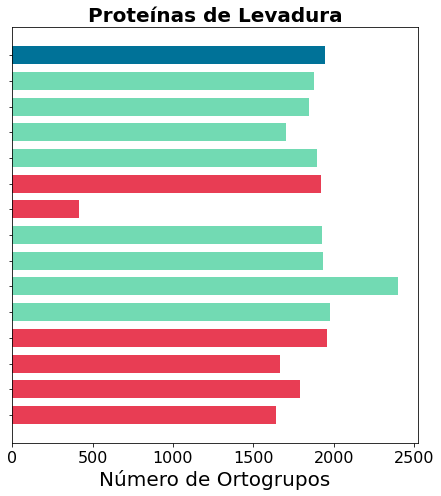

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    'File': [
       'Rhisto1', 'Spoumb1', 'Rhior3', 'Rhimi59_2', 'Mucrac1', 
        'Mucci3', 'Mucfus1', 'Mucend1', 'Phybl2', 'Sakvas1', 
        'Rhipu1', 'Liccor1', 'Cunech1', 'Hesve2finisherSC', 'Aspnid1'
    ],
    'Unique_Orthogroup': [
       1641, 1793, 1664, 1960, 1978,
       2402, 1931,1930, 417, 1924, 
       1895, 1702, 1845, 1875, 1949
    ]
}

df = pd.DataFrame(data)

# Definir las categorías
categoria_1 = ['Aspnid1']
categoria_2 = ["Mucci3",'Cunech1', 'Hesve2finisherSC', 'Liccor1', 'Mucend1', 'Mucfus1', 'Mucrac1', 'Rhipu1']
categoria_3 = ['Phybl2', 'Rhimi59_2', 'Rhior3',  'Rhisto1', "Sakvas1",  'Spoumb1']

# Asignar colores según la categoría
colors = []
for file in df['File']:
    if file in categoria_1:
        colors.append('#007298')
    elif file in categoria_2:
        colors.append('#72DAB3')
    elif file in categoria_3:
        colors.append('#E83D54')
    else:
        colors.append('gray')  # Color por defecto para otros (si hubiera)


# Crear el gráfico de barras vertical
fig, ax = plt.subplots(figsize=(6, 7))

# Añadir las barras para Unique_Orthogroup
bar_width = 0.7
bars = ax.barh(df['File'], df['Unique_Orthogroup'], color=colors, height=bar_width)

# Añadir títulos y etiquetas
#ax.set_title('Evolutionary Conservation of yeast-related proteins', fontsize=16, weight='bold')
ax.set_title('Proteínas de Levadura', fontsize=20, weight='bold')
ax.set_xlabel('Número de Ortogrupos', fontsize=20)
#ax.set_ylabel('Organisms', fontsize=14)
# Ajustar el tamaño de los números del eje x
ax.tick_params(axis='x', labelsize=16)

# Eliminar etiquetas de los ejes

ax.set_yticklabels([])

# Ajustar el espacio entre las barras
plt.subplots_adjust(left=0.25)

# Añadir leyenda
#handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec='k') for c in ['blue', 'green', 'red']]
#labels = ['Outgroup', 'Dimorphic', 'Non-dimorphic']
#ax.legend(handles, labels, fontsize=12, loc='upper right')

# Ajustar el diseño
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('Yeast_unique_values_comparison_colored_vertical.svg', format='svg',  bbox_inches='tight')
plt.show()

**Estudio con clústeres de los genes o proteínas de Micelio**

In [12]:
clustersM = pd.read_csv("clusters_only_mycelium_df_all.csv")
clustersM["ID"] = clustersM["ID"].astype(int)
clustersM

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia
0,0,0,0,Cluster 0,1447868,-6.807711,Mycelium
1,1,1,2,Cluster 1,1362638,-1.868635,Mycelium
2,2,2,4,Cluster 2,1452460,-2.115389,Mycelium
3,3,3,6,Cluster 3,1342161,-7.974664,Mycelium
4,7,7,13,Cluster 6,1448453,-3.087500,Mycelium
...,...,...,...,...,...,...,...
4037,11592,11592,20551,Cluster 8959,1483766,-1.869170,Mycelium
4038,11603,11603,20570,Cluster 8967,1492156,-4.118688,Mycelium
4039,11605,11605,20574,Cluster 8969,1526741,-3.914039,Mycelium
4040,11612,11612,20588,Cluster 8976,1545638,-4.563361,Mycelium


In [13]:
ortho_mycelium_all = pd.merge(Mucci3, clustersM, left_on="Mucci3", right_on="ID")
ortho_mycelium_all

,Orthogroup,Mucci3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia
0,OG0000006,1367719,5716,5716,9903,Cluster 4187,1367719,-1.502290,Mycelium
1,OG0000006,1460128,4739,4739,8172,Cluster 3433,1460128,-2.056497,Mycelium
2,OG0000006,1468263,6207,6207,10776,Cluster 4569,1468263,-7.463595,Mycelium
3,OG0000006,1492242,6427,6427,11167,Cluster 4740,1492242,-1.713265,Mycelium
4,OG0000006,1524740,6185,6185,10735,Cluster 4550,1524740,-7.811059,Mycelium
...,...,...,...,...,...,...,...,...,...
3933,OG0013782,1594171,9574,9574,16881,Cluster 7307,1594171,-3.319655,Mycelium
3934,OG0013783,1595331,3679,3679,6348,Cluster 2669,1595331,-6.692916,Mycelium
3935,OG0013786,1599598,6169,6169,10707,Cluster 4538,1599598,-1.213401,Mycelium
3936,OG0013787,1599941,10733,10733,19006,Cluster 8273,1599941,-3.156161,Mycelium


Se va a contar el número de veces que aparece cada ortogrupo

In [14]:
# Contar las apariciones de cada Orthogroup
orthogroup_countsM = ortho_mycelium_all['Orthogroup'].value_counts()

# Mostrar los resultados
print(orthogroup_countsM)
# Filtrar para mostrar solo los que no sean cero
orthogroup_counts_nonzeroM = orthogroup_countsM[orthogroup_countsM > 0]

# Mostrar los resultados
print(orthogroup_counts_nonzeroM)

Orthogroup
OG0000564    15
OG0000025    10
OG0002547     9
OG0000051     8
OG0000023     8
             ..
OG0003669     1
OG0003670     1
OG0003677     1
OG0003681     1
OG0013788     1
Name: count, Length: 3206, dtype: int64
Orthogroup
OG0000564    15
OG0000025    10
OG0002547     9
OG0000051     8
OG0000023     8
             ..
OG0003669     1
OG0003670     1
OG0003677     1
OG0003681     1
OG0013788     1
Name: count, Length: 3206, dtype: int64


In [15]:
import pandas as pd
import glob

# Define a dictionary to store DataFrames with file initials as keys
all_comparison_dfs = {}

# Get all file names ending with "_ortho.csv" in the current directory
csv_files = glob.glob("*_ortho.csv")

# Iterate through each CSV file
for filename in csv_files:
    # Extract the file initial (name part before "_ortho.csv")
    file_initial = filename.split('_')[0]
    
    # Read the CSV file
    current_df = pd.read_csv(filename)
    current_df = current_df.fillna(0)
    
    # Perform the comparison with Mucci3 or any control dataset
    # Assuming 'ortho_yeast_all' is your control DataFrame with 'Orthogroup'
    # Replace 'ortho_yeast_all' with your actual control DataFrame
    
    # Contar las apariciones de cada Orthogroup en el archivo de control
    control_counts = ortho_mycelium_all['Orthogroup'].value_counts()
    
    # Contar las apariciones de cada Orthogroup en el archivo del organismo actual
    organism_counts = current_df['Orthogroup'].value_counts()
    
    # Crear un DataFrame para comparar las cuentas
    comparison_df = pd.DataFrame({
        'Control_Counts': control_counts,
        'Organism_Counts': organism_counts
    })
    
    # Reemplazar NaN con 0
    comparison_df = comparison_df.fillna(0)
    # Filtrar filas donde las cuentas del control no sean cero
    comparison_df = comparison_df[comparison_df['Control_Counts'] > 0]
    
    # Filtrar filas donde las cuentas del organismo sean menores que las del control
    comparison_df = comparison_df[comparison_df['Organism_Counts'] == comparison_df['Control_Counts']]
    
    # Convertir las cuentas a enteros
    comparison_df = comparison_df.astype(int)
    
    # Agregar el DataFrame al diccionario con el nombre del organismo como clave
    all_comparison_dfs[file_initial] = comparison_df
    
    # Guardar los resultados en un archivo CSV
    output_file_path = f'{file_initial}_mycelium_comparison_counts.csv'
    comparison_df.to_csv(output_file_path)
    
    # Mostrar los resultados por consola
    print(f"Resultados para {file_initial}:")
   # print(comparison_df)
    print(len(comparison_df))




Resultados para Aspnid1:
2588
Resultados para Cunech1:
2501
Resultados para Hesve2finisherSC:
2528
Resultados para Liccor1:
2260
Resultados para Mucci3:
2756
Resultados para Mucend1:
2606
Resultados para Mucfus1:
2619
Resultados para Mucrac1:
2669
Resultados para Phybl2:
587
Resultados para Rhimi59:
2653
Resultados para Rhior3:
2122
Resultados para Rhipu1:
2517
Resultados para Rhisto1:
2176
Resultados para Sakvas1:
2539
Resultados para Spoumb1:
2357


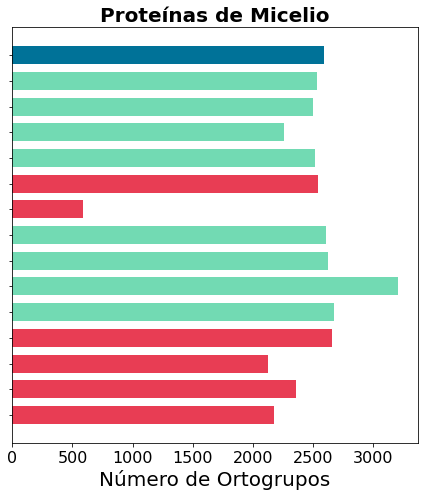

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    'File': [
       'Rhisto1', 'Spoumb1', 'Rhior3', 'Rhimi59_2', 'Mucrac1', 
        'Mucci3', 'Mucfus1', 'Mucend1', 'Phybl2', 'Sakvas1', 
        'Rhipu1', 'Liccor1', 'Cunech1', 'Hesve2finisherSC', 'Aspnid1'
    ],
    'Unique_Orthogroup': [
       2176, 2357, 2122, 2653, 2669,
       3206, 2619,2606, 587, 2539, 
       2517, 2260, 2501, 2528, 2588
    ]
}

df = pd.DataFrame(data)

# Definir las categorías
categoria_1 = ['Aspnid1']
categoria_2 = ["Mucci3",'Cunech1', 'Hesve2finisherSC', 'Liccor1', 'Mucend1', 'Mucfus1', 'Mucrac1', 'Rhipu1']
categoria_3 = ['Phybl2', 'Rhimi59_2', 'Rhior3',  'Rhisto1', "Sakvas1",  'Spoumb1']

# Asignar colores según la categoría
colors = []
for file in df['File']:
    if file in categoria_1:
        colors.append('#007298')
    elif file in categoria_2:
        colors.append('#72DAB3')
    elif file in categoria_3:
        colors.append('#E83D54')
    else:
        colors.append('gray')  # Color por defecto para otros (si hubiera)


# Crear el gráfico de barras vertical
fig, ax = plt.subplots(figsize=(6, 7))

# Añadir las barras para Unique_Orthogroup
bar_width = 0.7
bars = ax.barh(df['File'], df['Unique_Orthogroup'], color=colors, height=bar_width)

# Añadir títulos y etiquetas
#ax.set_title('Evolutionary Conservation of yeast-related proteins', fontsize=16, weight='bold')
ax.set_title('Proteínas de Micelio', fontsize=20, weight='bold')
ax.set_xlabel('Número de Ortogrupos', fontsize=20)
#ax.set_ylabel('Organisms', fontsize=14)

# Ajustar el tamaño de los números del eje x
ax.tick_params(axis='x', labelsize=16)

# Eliminar etiquetas de los ejes

ax.set_yticklabels([])

# Ajustar el espacio entre las barras
plt.subplots_adjust(left=0.25)

# Añadir leyenda
#handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec='k') for c in ['blue', 'green', 'red']]
#labels = ['Outgroup', 'Dimorphic', 'Non-dimorphic']
#ax.legend(handles, labels, fontsize=12, loc='upper right')

# Añadir leyenda fuera del gráfico
#handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec='k') for c in ['#007298', '#72DAB3', '#E83D54']]
#labels = ['Outgroup', 'Dimórfico', 'No-dimórfico']
#ax.legend(handles, labels, fontsize=16, loc=' right', bbox_to_anchor=(1.01, 1),  ncol=3)
# Añadir leyenda fuera del gráfico, debajo de las columnas
#ax.legend(handles, labels, fontsize=16, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)


# Ajustar el diseño
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('Mycelium_unique_values_comparison_colored_vertical.svg', format='svg',  bbox_inches='tight')
plt.show()

In [20]:
clusters_dim= pd.read_csv("clusters_dimorficos.csv")
ortho_dim = pd.merge(Mucci3, clusters_dim, left_on="Mucci3", right_on="ID")
ortho_dim

,Orthogroup,Mucci3,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Proteina,NumeroProteinas,Paralogos,Numero Paralogos,NumeroProteinas_fil
0,OG0000013,1032205,1734,6977,Cluster 2928,1032205,-10.758694,Micelio,Mucci_1032205,12,"1335736, 1362921, 1410908, 1518363, 1518395, 1...",11,9
1,OG0000013,1362921,1736,6979,Cluster 2928,1362921,-6.320171,Micelio,Mucci_1362921,12,"1032205, 1335736, 1410908, 1518363, 1518395, 1...",11,9
2,OG0000013,1410908,1737,6980,Cluster 2928,1410908,2.131525,Levadura,Mucci_1410908,12,"1032205, 1335736, 1362921, 1518363, 1518395, 1...",11,9
3,OG0000013,1518363,1738,6981,Cluster 2928,1518363,-3.941959,Micelio,Mucci_1518363,12,"1032205, 1335736, 1362921, 1410908, 1518395, 1...",11,9
4,OG0000013,1518395,1739,6982,Cluster 2928,1518395,-8.265396,Micelio,Mucci_1518395,12,"1032205, 1335736, 1362921, 1410908, 1518363, 1...",11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,OG0011421,1586495,2958,12680,Cluster 5408,1586495,-3.533640,Micelio,Mucci_1586495,4,"1368451, 1517791, 1517945",3,4
1719,OG0013654,1360710,2492,10339,Cluster 4378,1360710,1.004261,Levadura,Mucci_1360710,4,"1382080, 1448086, 1459906",3,4
1720,OG0013737,1527735,4043,19397,Cluster 8444,1527735,-1.300182,Micelio,Mucci_1527735,4,"1359075, 1487108, 1594967",3,3
1721,OG0013738,1531807,2482,10272,Cluster 4347,1531807,4.258350,Levadura,Mucci_1531807,3,"1351014, 1356832",2,3


In [21]:
# Contar las apariciones de cada Orthogroup
orthogroup_countsdim = ortho_dim['Orthogroup'].value_counts()

# Mostrar los resultados
print(orthogroup_countsdim)
# Filtrar para mostrar solo los que no sean cero
orthogroup_counts_nonzerodim = orthogroup_countsdim[orthogroup_countsdim > 0]

# Mostrar los resultados
print(orthogroup_counts_nonzerodim)

Orthogroup
OG0000783    31
OG0004538    15
OG0000629    15
OG0006980    12
OG0005940    10
             ..
OG0000791     1
OG0003238     1
OG0001344     1
OG0003261     1
OG0013768     1
Name: count, Length: 779, dtype: int64
Orthogroup
OG0000783    31
OG0004538    15
OG0000629    15
OG0006980    12
OG0005940    10
             ..
OG0000791     1
OG0003238     1
OG0001344     1
OG0003261     1
OG0013768     1
Name: count, Length: 779, dtype: int64


In [22]:
import pandas as pd
import glob

# Define a dictionary to store DataFrames with file initials as keys
all_comparison_dfs = {}

# Get all file names ending with "_ortho.csv" in the current directory
csv_files = glob.glob("*_ortho.csv")

# Iterate through each CSV file
for filename in csv_files:
    # Extract the file initial (name part before "_ortho.csv")
    file_initial = filename.split('_')[0]
    
    # Read the CSV file
    current_df = pd.read_csv(filename)
    current_df = current_df.fillna(0)
    
    # Perform the comparison with Mucci3 or any control dataset
    # Assuming 'ortho_yeast_all' is your control DataFrame with 'Orthogroup'
    # Replace 'ortho_yeast_all' with your actual control DataFrame
    
    # Contar las apariciones de cada Orthogroup en el archivo de control
    control_counts = ortho_dim['Orthogroup'].value_counts()
    
    # Contar las apariciones de cada Orthogroup en el archivo del organismo actual
    organism_counts = current_df['Orthogroup'].value_counts()
    
    # Crear un DataFrame para comparar las cuentas
    comparison_df = pd.DataFrame({
        'Control_Counts': control_counts,
        'Organism_Counts': organism_counts
    })
    
    # Reemplazar NaN con 0
    comparison_df = comparison_df.fillna(0)
    # Filtrar filas donde las cuentas del control no sean cero
    comparison_df = comparison_df[comparison_df['Control_Counts'] > 0]
    
    # Filtrar filas donde las cuentas del organismo sean menores que las del control
    comparison_df = comparison_df[comparison_df['Organism_Counts'] == comparison_df['Control_Counts']]
    
    # Convertir las cuentas a enteros
    comparison_df = comparison_df.astype(int)
    
    # Agregar el DataFrame al diccionario con el nombre del organismo como clave
    all_comparison_dfs[file_initial] = comparison_df
    
    # Guardar los resultados en un archivo CSV
    output_file_path = f'{file_initial}_dim_comparison_counts.csv'
    comparison_df.to_csv(output_file_path)
    
    # Mostrar los resultados por consola
    print(f"Resultados para {file_initial}:")
   # print(comparison_df)
    print(len(comparison_df))




Resultados para Aspnid1:
237
Resultados para Cunech1:
337
Resultados para Hesve2finisherSC:
339
Resultados para Liccor1:
311
Resultados para Mucci3:
582
Resultados para Mucend1:
461
Resultados para Mucfus1:
443
Resultados para Mucrac1:
505
Resultados para Phybl2:
30
Resultados para Rhimi59:
374
Resultados para Rhior3:
309
Resultados para Rhipu1:
318
Resultados para Rhisto1:
319
Resultados para Sakvas1:
336
Resultados para Spoumb1:
325


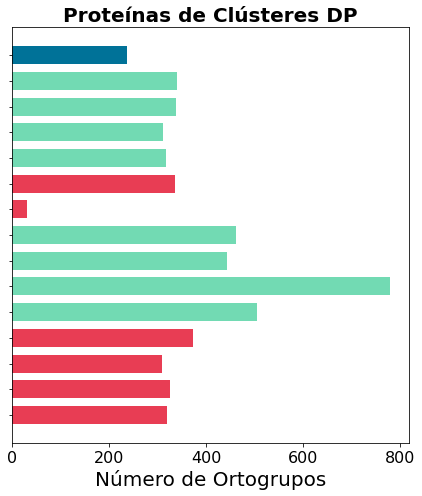

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    'File': [
       'Rhisto1', 'Spoumb1', 'Rhior3', 'Rhimi59_2', 'Mucrac1', 
        'Mucci3', 'Mucfus1', 'Mucend1', 'Phybl2', 'Sakvas1', 
        'Rhipu1', 'Liccor1', 'Cunech1', 'Hesve2finisherSC', 'Aspnid1'
    ],
    'Unique_Orthogroup': [
       319, 325, 309, 374, 505,
       779, 443,461, 30,336, 
       318, 311, 337, 339, 237
    ]
}

df = pd.DataFrame(data)

# Definir las categorías
categoria_1 = ['Aspnid1']
categoria_2 = ["Mucci3",'Cunech1', 'Hesve2finisherSC', 'Liccor1', 'Mucend1', 'Mucfus1', 'Mucrac1', 'Rhipu1']
categoria_3 = ['Phybl2', 'Rhimi59_2', 'Rhior3',  'Rhisto1', "Sakvas1",  'Spoumb1']

# Asignar colores según la categoría
colors = []
for file in df['File']:
    if file in categoria_1:
        colors.append('#007298')
    elif file in categoria_2:
        colors.append('#72DAB3')
    elif file in categoria_3:
        colors.append('#E83D54')
    else:
        colors.append('gray')  # Color por defecto para otros (si hubiera)

# Crear el gráfico de barras vertical
fig, ax = plt.subplots(figsize=(6, 7))

# Añadir las barras para Unique_Orthogroup
bar_width = 0.7
bars = ax.barh(df['File'], df['Unique_Orthogroup'], color=colors, height=bar_width)

# Añadir títulos y etiquetas
#ax.set_title('Evolutionary Conservation of yeast-related proteins', fontsize=16, weight='bold')
ax.set_title('Proteínas de Clústeres DP', fontsize=20, weight='bold')
ax.set_xlabel('Número de Ortogrupos', fontsize=20)
#ax.set_ylabel('Organisms', fontsize=14)

# Ajustar el tamaño de los números del eje x
ax.tick_params(axis='x', labelsize=16)
# Eliminar etiquetas de los ejes

ax.set_yticklabels([])

# Ajustar el espacio entre las barras
plt.subplots_adjust(left=0.25)

# Añadir leyenda
#handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec='k') for c in ['blue', 'green', 'red']]
#labels = ['Outgroup', 'Dimorphic', 'Non-dimorphic']
#ax.legend(handles, labels, fontsize=12, loc='upper right')

# Añadir leyenda fuera del gráfico
#handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec='k') for c in ['blue', 'green', 'red']]
#labels = ['Outgroup', 'Dimórfico', 'No-dimórfico']
#ax.legend(handles, labels, fontsize=16, loc=' right', bbox_to_anchor=(1.01, 1),  ncol=3)
# Añadir leyenda fuera del gráfico, debajo de las columnas
#ax.legend(handles, labels, fontsize=16, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)


# Ajustar el diseño
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('Dim_unique_values_comparison_colored_vertical.svg', format='svg',  bbox_inches='tight')
plt.show()

Procesamiento de Archivos CSV y Análisis de Ortogrupos
Para analizar los datos de ortogrupos de distintos organismos, se utilizó el siguiente procedimiento:

**1. Lectura y Preprocesamiento de Archivos CSV:**

Se utilizó la biblioteca glob para obtener una lista de todos los archivos que terminan en _ortho.csv en el directorio actual. Esta biblioteca permite realizar búsquedas de archivos que coincidan con un patrón específico.

**2. Iteración y Procesamiento de Cada Archivo:**

Se iteró a través de cada archivo CSV. El nombre del archivo se utilizó para extraer una parte inicial que identificara el organismo correspondiente.

**3. Lectura y Unión de Datos:**

Cada archivo CSV fue leído y se llenaron los valores faltantes (NaN) con ceros.
Se realizó una unión (merge) con un DataFrame base ortho_dim_L (previamente cargado) basado en la columna "Orthogroup", utilizando una unión derecha (how="right").

**4. Filtrado de Datos:**

Se aseguraron de que la columna extraída del nombre del archivo estuviera presente en el DataFrame resultante.
Se eliminaron duplicados basados en la columna identificada por file_initial, conservando solo la primera ocurrencia.
Se filtraron las filas para mantener aquellas donde el valor en file_initial no fuera cero.
Si existía una columna denominada 'Mucci3', también se eliminaron duplicados basados en esta columna.

**5. Almacenamiento de Resultados:**

Los DataFrames únicos procesados se almacenaron en un diccionario con la parte inicial del nombre del archivo como clave.
Cada DataFrame único se guardó en un nuevo archivo CSV con el nombre basado en la parte inicial del nombre original.
Se contaron y se imprimieron los valores únicos en las columnas file_initial y Orthogroup.

Este procedimiento permitió procesar y analizar eficientemente los datos de ortogrupos de múltiples organismos, asegurando la eliminación de duplicados y la correcta asociación de datos entre distintos archivos, facilitando así el análisis comparativo de motivos y ortogrupos.

In [14]:
import glob
# Define a dictionary to store DataFrames with file initials as keys
all_unique_dfs = {}

# Get all file names ending with "ortho.csv" in the current directory
csv_files = glob.glob("*_ortho.csv")

# Iterate through each CSV file
for filename in csv_files:
    # Extract the file initial (name part before "_ortho.csv")
    file_initial = '_'.join(filename.split('_')[:-1])
    
    # Read the CSV file
    current_df = pd.read_csv(filename)
    current_df = current_df.fillna(0)
    
    # Merge with ortho_dim_L (assuming it's already loaded) based on "Orthogroup"
    merged_df = pd.merge(ortho_yeast_all, current_df, on="Orthogroup", how="inner")
    
    # Ensure the column extracted from the filename is in the DataFrame
    if file_initial in merged_df.columns:
        # Remove duplicates based on the renamed column name, keeping the first occurrence
        unique_df = merged_df.drop_duplicates(subset=[file_initial], keep="first")
        
        # Filter to keep rows where the renamed column is not zero
        unique_df = unique_df[unique_df[file_initial] != 0]
        
        # Ensure 'Mucci3' column exists in the DataFrame before removing duplicates
        if 'Mucci3' in unique_df.columns:
            # Remove duplicates based on "Mucci3", keeping the first occurrence
            unique_df = unique_df.drop_duplicates(subset=["Mucci3"], keep="first")
        
        # Store the unique DataFrame with the file initial as the key
        all_unique_dfs[file_initial] = unique_df
        
        # Save the unique DataFrame to a CSV file with the name file_initial.csv
        output_filename = f"{file_initial}.csv"
        unique_df.to_csv(output_filename, index=False)
        
        # Count unique values in the file_initial column and Orthogroup column
        unique_count_file_initial = unique_df[file_initial].nunique()
        unique_count_orthogroup = unique_df["Orthogroup"].nunique()
        
        # Print the counts
        print(f"File: {output_filename}")
        print(f"Unique values in column '{file_initial}': {unique_count_file_initial}")
        print(f"Unique values in column 'Orthogroup': {unique_count_orthogroup}")
    else:
        print(f"Column {file_initial} not found in the merged DataFrame for file {filename}")

# Now all_unique_dfs contains the processed DataFrames


File: Aspnid1.csv
Unique values in column 'Aspnid1': 1258
Unique values in column 'Orthogroup': 1258
File: Cunech1.csv
Unique values in column 'Cunech1': 1954
Unique values in column 'Orthogroup': 1954
File: Hesve2finisherSC.csv
Unique values in column 'Hesve2finisherSC': 1929
Unique values in column 'Orthogroup': 1929
File: Liccor1.csv
Unique values in column 'Liccor1': 1817
Unique values in column 'Orthogroup': 1817
Column Mucci3 not found in the merged DataFrame for file Mucci3_ortho.csv
File: Mucend1.csv
Unique values in column 'Mucend1': 2162
Unique values in column 'Orthogroup': 2162
File: Mucfus1.csv
Unique values in column 'Mucfus1': 2117
Unique values in column 'Orthogroup': 2117
File: Mucrac1.csv
Unique values in column 'Mucrac1': 2268
Unique values in column 'Orthogroup': 2268
File: Phybl2.csv
Unique values in column 'Phybl2': 1993
Unique values in column 'Orthogroup': 1993
File: Rhimi59_2.csv
Unique values in column 'Rhimi59_2': 2060
Unique values in column 'Orthogroup': 20

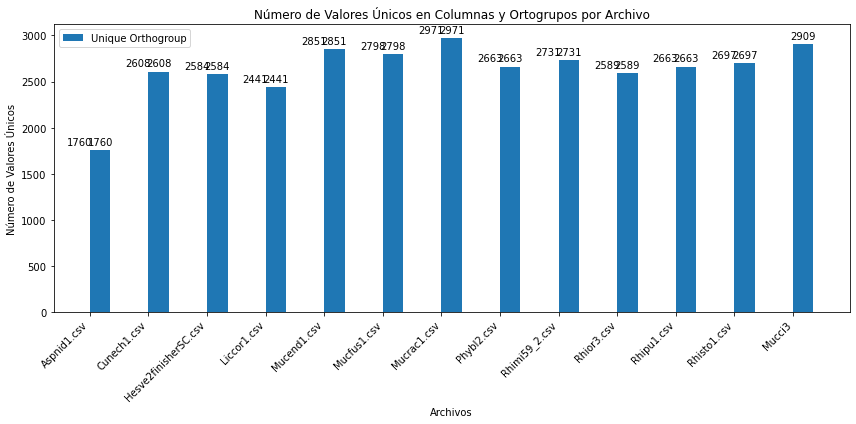

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    'File': [
        'Aspnid1', 'Cunech1', 'Hesve2finisherSC', 'Liccor1', 'Mucend1', 
        'Mucfus1', 'Mucrac1', 'Phybl2, 'Rhimi59_2', 'Rhior3', 
        'Rhipu1', 'Rhisto1', "Mucci3"
    ],
    
    'Unique_Orthogroup': [
        1760, 2608, 2584, 2441, 2851, 2798, 2971, 2663, 2731, 2589, 2663, 2697, 2909
    ]
}

df = pd.DataFrame(data)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Añadir las barras para Unique_Column y Unique_Orthogroup
bar_width = 0.35

bar2 = ax.bar(df.index + bar_width/2, df['Unique_Orthogroup'], bar_width, label='Unique Orthogroup')

# Añadir títulos y etiquetas
ax.set_title('Número de Valores Únicos en Columnas y Ortogrupos por Archivo')
ax.set_xlabel('Archivos')
ax.set_ylabel('Número de Valores Únicos')
ax.set_xticks(df.index)
ax.set_xticklabels(df['File'], rotation=45, ha='right')

# Añadir leyenda
ax.legend()

# Añadir etiquetas en las barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Ajustar el diseño
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('unique_values_comparison.svg', format='svg')
plt.show()
